rewritten from: https://github.com/JRussellHuffman/quantum-dice/blob/master/randomNumGenerator.py 

In [1]:
import qiskit
from qiskit import *
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor
%matplotlib inline
with open('tocken.txt', 'r') as file:
    myTocken = file.read().replace('\n', '')
IBMQ.save_account(myTocken,overwrite=True)
IBMQ.load_account()
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr,cr)

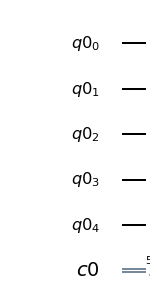

In [2]:
circuit.draw(output='mpl')

In [3]:
for x in range(0, 5):
    circuit.h(qr[x])

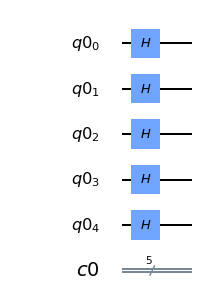

In [4]:
circuit.draw(output='mpl')

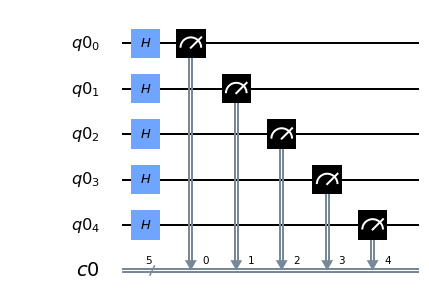

In [5]:
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')
shots = 1024
sim_job = execute(circuit, backend=simulator,shots=shots,memory=True)
sim_result = sim_job.result()
#to retrieve the results independently, instead of as a probability
sim_memory = sim_result.get_memory()
sim_outputArray = []
for x in range(0, shots):
    converted = int(sim_memory[x], 2)
    sim_outputArray.append(converted)
print(sim_outputArray)

[19, 17, 9, 16, 18, 3, 28, 26, 3, 23, 21, 6, 29, 16, 16, 21, 14, 12, 5, 5, 24, 29, 17, 13, 10, 4, 3, 18, 22, 16, 29, 26, 3, 9, 31, 23, 9, 7, 2, 1, 29, 24, 30, 22, 7, 30, 17, 27, 16, 22, 15, 23, 7, 30, 14, 3, 6, 20, 31, 1, 4, 28, 9, 2, 14, 8, 31, 1, 6, 3, 17, 31, 25, 22, 14, 19, 8, 9, 29, 2, 24, 29, 22, 17, 13, 9, 18, 11, 27, 21, 24, 1, 18, 23, 8, 11, 14, 21, 11, 2, 20, 26, 21, 31, 18, 25, 23, 18, 3, 8, 2, 17, 8, 5, 8, 4, 5, 18, 5, 15, 15, 24, 7, 28, 18, 27, 20, 13, 2, 29, 25, 6, 24, 15, 3, 12, 11, 12, 2, 20, 1, 18, 20, 30, 4, 16, 20, 11, 19, 4, 8, 14, 28, 1, 16, 26, 21, 23, 15, 7, 28, 23, 15, 21, 20, 19, 31, 7, 16, 27, 13, 28, 22, 10, 6, 0, 14, 15, 13, 30, 6, 9, 12, 29, 4, 3, 2, 24, 15, 30, 8, 1, 24, 4, 2, 22, 17, 13, 2, 13, 18, 20, 29, 30, 30, 15, 14, 0, 29, 10, 12, 13, 25, 16, 22, 13, 11, 13, 3, 9, 8, 15, 5, 1, 11, 0, 21, 19, 4, 13, 1, 7, 14, 29, 19, 1, 30, 21, 21, 20, 17, 21, 8, 11, 12, 7, 5, 9, 1, 1, 20, 22, 15, 0, 7, 18, 7, 28, 8, 8, 16, 19, 16, 18, 26, 1, 23, 6, 6, 20, 14, 8, 8, 

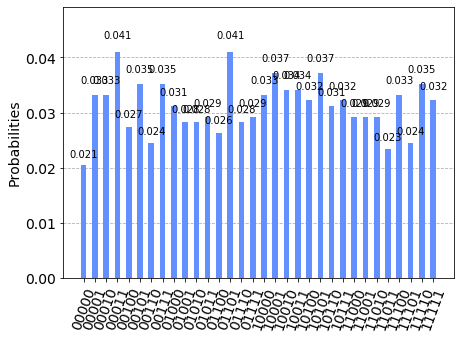

In [7]:
plot_histogram(sim_result.get_counts(circuit))

In [8]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
shots = 1024
q_job = execute(circuit, qcomp, shots = shots, memory=True)
job_monitor(q_job)
q_result = q_job.result()
q_memory = q_result.get_memory()
q_outputArray = []
for x in range(0, shots):
    converted = int(q_memory[x], 2)
    q_outputArray.append(converted)
print(q_outputArray)

Job Status: job has successfully run
[0, 27, 29, 1, 19, 16, 31, 5, 11, 4, 22, 7, 8, 21, 6, 24, 4, 3, 28, 26, 29, 12, 18, 1, 9, 8, 16, 17, 23, 29, 15, 5, 6, 8, 17, 27, 13, 21, 18, 27, 20, 24, 7, 25, 28, 13, 29, 0, 16, 20, 0, 18, 27, 18, 15, 14, 5, 20, 8, 13, 21, 13, 23, 5, 1, 19, 4, 25, 5, 19, 11, 29, 9, 15, 11, 0, 13, 17, 15, 16, 0, 16, 12, 1, 20, 9, 6, 1, 26, 4, 13, 18, 27, 20, 7, 25, 13, 8, 18, 28, 30, 18, 13, 20, 23, 11, 22, 20, 0, 5, 12, 25, 29, 31, 13, 0, 25, 10, 14, 0, 13, 9, 25, 23, 27, 22, 12, 8, 10, 8, 26, 5, 23, 22, 23, 3, 14, 13, 0, 8, 21, 3, 19, 2, 21, 4, 5, 8, 5, 11, 23, 12, 17, 1, 7, 31, 6, 13, 7, 30, 25, 1, 28, 28, 15, 24, 1, 16, 18, 10, 17, 8, 3, 16, 15, 1, 26, 4, 2, 29, 17, 12, 11, 19, 22, 18, 22, 7, 2, 18, 23, 8, 28, 27, 4, 0, 24, 31, 14, 26, 7, 27, 25, 20, 9, 24, 30, 4, 29, 31, 6, 24, 13, 11, 1, 28, 8, 2, 26, 4, 13, 8, 13, 20, 24, 21, 23, 12, 24, 10, 1, 25, 5, 4, 14, 22, 2, 2, 19, 26, 20, 24, 10, 20, 18, 13, 8, 3, 11, 4, 14, 4, 22, 8, 7, 26, 0, 31, 2, 13, 15, 31, 24,

In [10]:
print(sim_memory)

['10011', '10001', '01001', '10000', '10010', '00011', '11100', '11010', '00011', '10111', '10101', '00110', '11101', '10000', '10000', '10101', '01110', '01100', '00101', '00101', '11000', '11101', '10001', '01101', '01010', '00100', '00011', '10010', '10110', '10000', '11101', '11010', '00011', '01001', '11111', '10111', '01001', '00111', '00010', '00001', '11101', '11000', '11110', '10110', '00111', '11110', '10001', '11011', '10000', '10110', '01111', '10111', '00111', '11110', '01110', '00011', '00110', '10100', '11111', '00001', '00100', '11100', '01001', '00010', '01110', '01000', '11111', '00001', '00110', '00011', '10001', '11111', '11001', '10110', '01110', '10011', '01000', '01001', '11101', '00010', '11000', '11101', '10110', '10001', '01101', '01001', '10010', '01011', '11011', '10101', '11000', '00001', '10010', '10111', '01000', '01011', '01110', '10101', '01011', '00010', '10100', '11010', '10101', '11111', '10010', '11001', '10111', '10010', '00011', '01000', '00010', 

In [9]:
q_job.error_message()